# Atividade 5
-Escolha uma base de classificação e compare os classificadores Logistic Regression e KNN do scikit-learn.

-Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.

-Calcule a média das repetições de cada avaliação.

## Bibliotecas

In [1]:
# Biliotecas para dados
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# Bibliotecas para aprendizado de Maquina Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import minmax_scale
from sklearn.pipeline import Pipeline

## Base de dados

In [3]:
df = pd.read_csv("C:/Users/mathe/Desktop/Aula REPA/atividade 5/Mobile Price Classification train.csv")
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X = X.values
y = y.values

In [6]:
set(y)

{0, 1, 2, 3}

## Regressão Logistica

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Sem Padronização
parametros = {'penalty': ['l2']}

GridSearchLR = GridSearchCV(LogisticRegression(max_iter=1000), parametros, scoring='neg_root_mean_squared_error')

modelo = Pipeline([
    #("padronização", standa()),
    ("gsknn", GridSearchLR)
])
scores = cross_validate(modelo, X, y, scoring=make_scorer(mean_squared_error, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

[0.57662813 0.56789083 0.54543561 0.57227616 0.58736701]
Sem padronização: 0.5699195466763738


In [9]:
# Com Padronização
parametros = {'penalty': ['l2']}

GridSearchLR = GridSearchCV(LogisticRegression(max_iter=100), parametros, scoring='neg_root_mean_squared_error')

modelo = Pipeline([
    ("padronização", StandardScaler()),
    ("gsknn", GridSearchLR)
])
scores = cross_validate(modelo, X, y, scoring=make_scorer(mean_squared_error, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

[0.2        0.21213203 0.18027756 0.19364917 0.18027756]
Com padronização: 0.1932672658425468


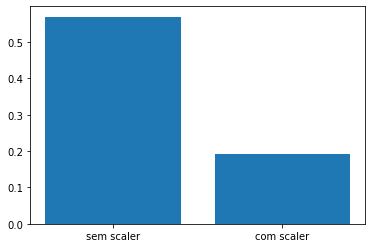

In [10]:
# Gráfico em colunas
colunas = ["sem scaler", "com scaler"]
plt.bar(colunas, [sempad,compad])
plt.show()

## KNN

In [11]:
# Sem padronização
parametros = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

GridSearchKNN = GridSearchCV(KNeighborsRegressor(), parametros, scoring='neg_root_mean_squared_error')

modelo = Pipeline([
    #("padronização", StandardScaler()),
    ("gsknn", GridSearchKNN)
])
scores = cross_validate(modelo, X, y, scoring=make_scorer(mean_squared_error, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

[0.22945588 0.23339946 0.22825424 0.23471811 0.24526771]
Sem padronização: 0.23421908155554344


In [12]:
# Com Padronização
parametros = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

GridSearchKNN = GridSearchCV(KNeighborsRegressor(), parametros, scoring='neg_root_mean_squared_error')

modelo = Pipeline([
    ("padronização", StandardScaler()),
    ("gsknn", GridSearchKNN)
])
scores = cross_validate(modelo, X, y, scoring=make_scorer(mean_squared_error, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

[0.65821729 0.63919872 0.68153664 0.6261779  0.6751543 ]
Com padronização: 0.6560569698350769


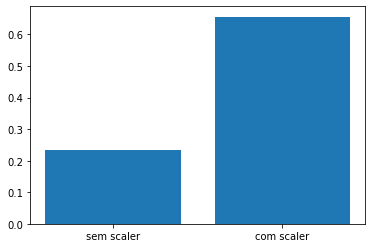

In [13]:
# Gráfico em colunas
colunas = ["sem scaler", "com scaler"]
plt.bar(colunas, [sempad,compad])
plt.show()

#plt.bar(colunas, np.array([sempad,compad]) -0.9, bottom=1)
#plt.show()